# Assignment 2 Answers


## True/False Questions (20 pts)

### Problem 1.1 (2 pts) 

Batch normalization pushes the mean of activations to zero. As each layer of the deep neural networks prefer normalized inputs, batch normalization helps a lot in improving the learning process of deep neural networks.

>True. This is because as the activations of previous layers change, the proceeding layer's inputs change and it is more difficult for a neural network to adapt to changing inputs. Batch normalization makes the activations have a mean of zero and a unit variance at all stages of the training process. 

### Problem 1.2 (2 pts) 

PyTorch uses dynamic graphs to represent deep neural networks. Tensors are eagerly computed during the forward/backward process. Thus, you can fetch the contents of tensors at any time of the computation.

> True. Pytorch uses a dynamic graph. This means that the computational graph is built once the variables are delcared. Tensors are eagerly computed during the forward and backward pass meaning that one would be able to fetch the contents of tensors at any time.

### Problem 1.3 (2 pts) 

Data augmentation is beneficial for any kinds of deep neural networks.

>False. For small datasets, augmentation may actually lead to underfitting. In addition to this, the wrong types of data augmentation may actually hurt the model performance. For instance, a vertical flip on the MNIST data causes 6's to look like 9's, which may lead to poorer performance. 

### Problem 1.4 (2 pts) 

When we train on complicated datasets using an optimizer with dynamic learning rate (e.g., Adam optimizer), it is a common practice to increase the hyperparameter ‘epsilon’ (e.g., increase to 1.0) to improve numeric stability and avoid oscillation.

>True. Epsilon is used to prevent any division by zero in the implementation. Epsilon is a generally a small value located in the denominator of the weight update calculation. For this reason, having a small epsilon leads to larger weight updates. Therefore, a smaller epsilon leads to quicker convergence but for optimizers like Adam, a larger epsilon is recommended in the documentation. Having a small epsilon could result in oscillation and numeric unstability when the model is close to converging. By increasing epsilon we can avoid this oscillation and numeric instability. 

### Problem 1.5 (2 pts) 

Using both L-norm regularization and dropout ensures to achieve higher validation accuracy than using only one of these methods during training.

>False. In some instances, dropout does not cooperate well with L-norm regularization, and so higher validation accuracy is not ensured when using both. Whether L-norm regularization and dropout work together or against each other depends on the specific model at hand.

### Problem 1.6 (2 pts) 

Compared to ReLU, leaky ReLU solves the problem of dead neurons (dying ReLU), but is more unstable due to non-zero gradient on the negative side of the activations.

> False. Leaky ReLU does indeed solve the problems of dead neurons, as it has a slope for negative inputs, thus allowing negative neurons to update weights. However, in some cases, this inconsistent slope (not the non-zero gradient on the negative side of activations),makes the training process of some neural network architectures unstable. Leaky ReLU may also take more time to reach convergence. 

### Problem 1.7 (2 pts) 

During training, Lasso (L1) regularizer regularizes the model to have a higher sparsity compared to Ridge (L2) regularizer.

> True. L1 regualrization has a diamond loss contour meaning that L1 loss usually meets the feasible solution loss on the corner of the diamond shape. As a result, L1 regularization is more likely to obtain spare wieghts. On the other hand, since L2 has a circular loss contour, the feasible solution loss will be on the circumference of the loss contour, leading to obtaining small weight values instead of 0s. 

### Problem 1.8 (2 pts) 

MobileNets use depthwise separable convolution to improve the model efficiency. If we replace all of the 3x3 convolution layers to 3x3 depthwise separable convolution layers in ResNet architectures, we are likely to observe approximately 9x speedup for these layers.

> True. MobileNets use depthwise separable convolution to reduce computational overhead within operations. Depthwise separable convolution reduces the amount of parameters and thus the amount of computation. 

> The calculation for MACs for a regular 3x3 and depthwise separable convolution is shown below


$$3x3 \: convolution =  3 \times 3 \times M \times N \times D_{f} \times D_{f}$$

$$3x3 \: depthwise\:separable\:convolution =  3 \times 3 \times M \times N \times D_{f} \times D_{f} \times D_{f} \times D_{f} \times M \times N$$

>If we then calculate the speedup as:

$$\frac{3 \times 3 \times M \times N \times D_{f} \times D_{f}}{3 \times 3 \times M \times N \times D_{f} \times D_{f} \times D_{f} \times D_{f} \times M \times N} \approx 9$$

>We can see that the theoretical speedup is about 9x faster for these layers.

### Problem 1.9 (2 pts) 

SqueezeNet puts most of the computations in later stages of the CNN design. Therefore, SqueezeNet uses fewer parameters than early CNN designs (e.g., AlexNet) while achieving comparable performance.

> False. The paper introducing SqueezeNet states that it has AlexNet level accuracy with 50x fewer parameters. This in turn leads to a smaller model size than AlexNet. Squeezenet down-samples late in the network to spend more computation budgets on larger activation maps. There are more convolutional layers at the earlier stage of the CNN architecture, meaning that most of the computation is done early on. The model starts with large H $\times$ W. As the model proceeds, the H and W dimensions are reduced while the channel number increases. Looking at the initial convolution layer which takes in a size of 224x224x3 and outputs 111x111x96, and comparing this to the last convolution which takes in 13x13x512, and outputs 13x13x100, it is clear that the earlier convolutions use more computation power. 

### Problem 1.10 (2 pts) 

Deep residual networks introduce shortcut connections to smooth the loss surface.

> True. The loss surface of residual networks (e.g. ResNet) do smooth the loss surface. This makes the optimization process much more straightforward as finding a sharp minima will be easier. 

# Lab 1: LeNet - CIFAR10

**(a)**

(2 pts) As a sanity check, we should verify the implementation of the LeNet-5 model. How could you check whether the LeNet-5 model has the expected behavior?


>If the weights are initialized with evenly random numbers, we expect our loss to be log N where N is the number of classes present in the dataset. Since there are 10 classes in the CIFAR 10 dataset, we would expect our loss to be around 2.3. 

**(b)** 

(4 pts) Dataset preprocessing is often used in both the training process and the testing process. Our target dataset, the CIFAR-10 dataset consists of 60,000 images with pixel values ranging from 0 to 255. How shall we normalize these images to have zero mean and unit variance? Please refer to Step 1 on our Jupyter Notebook and fill out the required transformation for the CIFAR-10 dataset. (Note that additional data augmentation like RandomCrop, RandomFlip transformations are allowed for this question).

> We can normalize these images to have zero mean and unit variance by using the torchvision.transforms.Normalize function. The function uses the formula located below. By dividing subtracting the mean and dividing by the standard deviation of the dataset, we are able to achieve normalized values for brightness, contrast, and saturation. 

$$output = \frac{input - mean}{std}$$

**(d)** 

(2 pts) We may instantiate our model and deploy it to GPUs for efficient training. Please refer to Step 3 in the code to instantiate and deploy your LeNet-5 model on GPUs. How can you verify that your model is deployed on GPU? (Hint: check nvidia-smi).

> nvidia-smi can be used in the terminal to check processes running on GPU. If running locally, you can also check the activity monitor on OSX to see how much GPU is being utilized. 

**(g)**

(8 pts) You can start training with your completed training pipeline with the provided hyper- parameter setting. What is the initial loss value before you conduct any training step? How is it related to the number of classes in CIFAR-10? What can you observe from training accuracy and validation accuracy? Do you notice any problems with the current training pipeline?

>The initial loss value before conducting any training was approximately 2.30. We see 10 classes in the CIFAR-10 dataset. We can define our loss using the cross entropy loss formula: $$-\sum_{j}y^{j}_{i}log(s_{i}^{j})$$

>Where $y^{j}_{i}$ is the actual classification (0 or 1) and $s_{i}^{j}$ is the predicted probabilities of each class. When we have 10 classes and the model has not yet been trained, all of the classes have an equivalent probability (random guess).

$$-1 \times log(.1) \approx 2.30$$

> A shortcut to find the loss is just doing log(# of classes) which is how the initial loss and the number of classes relate. 

$$ log(10) \approx 2.30$$

>The training accuracy constantly increases and the validation accuracy decreases up to epoch 22. After epoch 22, the validation loss increases suggesting that the model is begenning to overfit on the training data. To solve this problem, the model could be initialized with a lower learning rate or use early stopping to save the model with the highest validation accuracy. 

**(h)** 

(Bonus, 4 pts) Currently, we take the default weight initialization method from PyTorch, which is sub-optimal. Try to adopt more advanced weight initialization techniques (e.g., Kaiming- Normal [1]). What can you observe when switching to a more advanced weight initialization?

>When switching to kaiming normal and xavier normal, I did not find any difference in how many epochs the model took to train. The initial training and validation loss are similar between these weight initializations and the highest validation between models was comparable; both had values of approximately 0.64.  

# Lab 2: Improving the Pipeline

**(a)**

(6 pts) Data augmentation techniques help combat overfitting. Please add two data augmentations — random crop and random flip — into the training pipeline. You may explore some options (hyperparameters) for these data augmentations. What kind of options (hyperparameters) for these data augmentations can give the best result?

>Upon exploring various hyperparameters, I found that using random crop with a padding of 4 and using random horizontal flip with a 0.5 probability gave the best result. I was able to achieve a validation accuracy of 0.70 in 50 epochs. 

**(b)**

(12 pts) Model design is another important factor in determining performance on a given task. Now, modify the design of LeNet-5 as instructed below:

• (4 pts) Add a batch normalization layer after each convolution/fully-connected layer except the last layer. What can you observe from the training process?

> Adding batch normalization layers after each convolution and fully connected layer (except the last), increased by validation accuracy up to approximately 0.73 after 50 epochs. I ran the model for more epochs after to explore if additional training could get the validation accuracy higher but bound that the validation accuracy plateaued around 0.73.



• (4 pts) Use empirical results to show that batch normalization allows a larger learning rate.

>Shown in the plots below, we can see that each batch normalization performed better than not using batch normalization for all learning rates tested. BN is definied as batch normalization in the legend. When learning rate is high (0.1), the model without batch normalization converges at a training and validation accuracy of about 0.35 after 50 epochs. When batch normalization is used with this learning rate, the model converges with both a validation and training accuracy of approximately 0.68 after 50 epochs. This displays that batch normalization allows for a larger learning rate. 

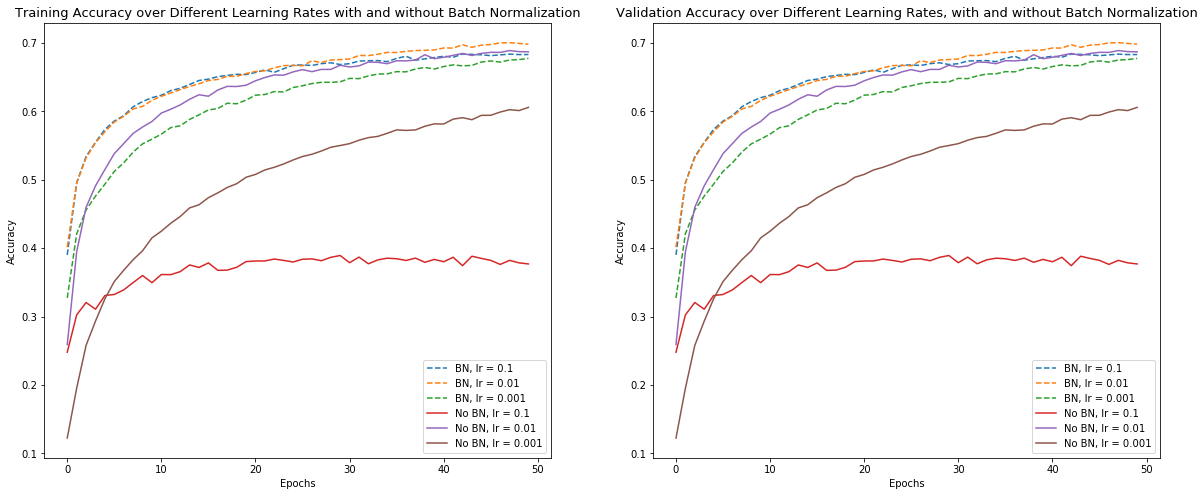

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
bn10 = pd.read_csv("bn_lr10.csv")
bn10NEW = pd.read_csv("bn_lr10NEW.csv")
bn1 = pd.read_csv("bn_lr1.csv")

bn01 = pd.read_csv("bn_lr01.csv")
bn02 = pd.read_csv("bn_lr02.csv")
bn05 = pd.read_csv("bn_lr05.csv")

bn001 = pd.read_csv("bn_lr001.csv")
bn002 = pd.read_csv("bn_lr002.csv")
bn005 = pd.read_csv("bn_lr005.csv")

reg1 = pd.read_csv("reg_lr1.csv")
reg01 = pd.read_csv("reg_lr01.csv")
reg001 = pd.read_csv("reg_lr001.csv")

all_list = [bn1, bn01, bn001, reg1, reg01, reg001]
label_list = ['BN, lr = 0.1', 'BN, lr = 0.01', 'BN, lr = 0.001', 'No BN, lr = 0.1', 'No BN, lr = 0.01', 'No BN, lr = 0.001']

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
for i in range(len(all_list)):
    # Plot train acc
    plt.title('Training Accuracy over Different Learning Rates with and without Batch Normalization', size = 13)
    if i > 2:
        plt.plot(all_list[i].iloc[:,1], label = label_list[i])
    else:
        plt.plot(all_list[i].iloc[:,1], label = label_list[i], linestyle = '--')
    
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()
    


plt.subplot(1,2,2)
for i in range(len(all_list)):
    # Plot validation acc
    plt.title('Validation Accuracy over Different Learning Rates, with and without Batch Normalization', size = 13)
    if i > 2:
        plt.plot(all_list[i].iloc[:,1], label = label_list[i])
    else:
        plt.plot(all_list[i].iloc[:,1], label = label_list[i], linestyle = '--')
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()

plt.show()

• (4 pts) Implement Swish activation in PyTorch, and replace all of the ‘ReLU’ activations in LeNet-5 to ‘Swish.’ Does it improve the performance of LeNet-5?

>Using the swish activation function, after running the model for 50 epochs, I was able to achieve a validation accuracy of 0.735 compared to 0.70 which was obtained using the ReLU activation function. Swish activation does improve the performance of LeNet-5. 

**(c)** 

(12 pts) Hyperparameter settings are very important and can have a large impact on the final model performance. Based on the improvements that you have made to the model design thus far, tune some of the hyperparameters as instructed below:

• (6 pts) Apply different learning rate values: 1.0, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, to see how the learning rate affects the model performance, and report results for each. Is a large learning rate usually beneficial for model training? If not, what can you conclude from the choice of learning rate?

>Most learning rates work fine except for a learning rate of 1. Larger learning rates are useful towards converging towards a solution in less epochs but when the learning rate is too large, it will cause the weight updates to be too large. This will result in an extremly sub optimal solution as shown below. The best learning rate appears to be either 0.05 or 0.02. Using a 0.05 learning rate in conjunction with learning rate decay is likely to yield a close to optimal solution. 0.05 will be used going forward.

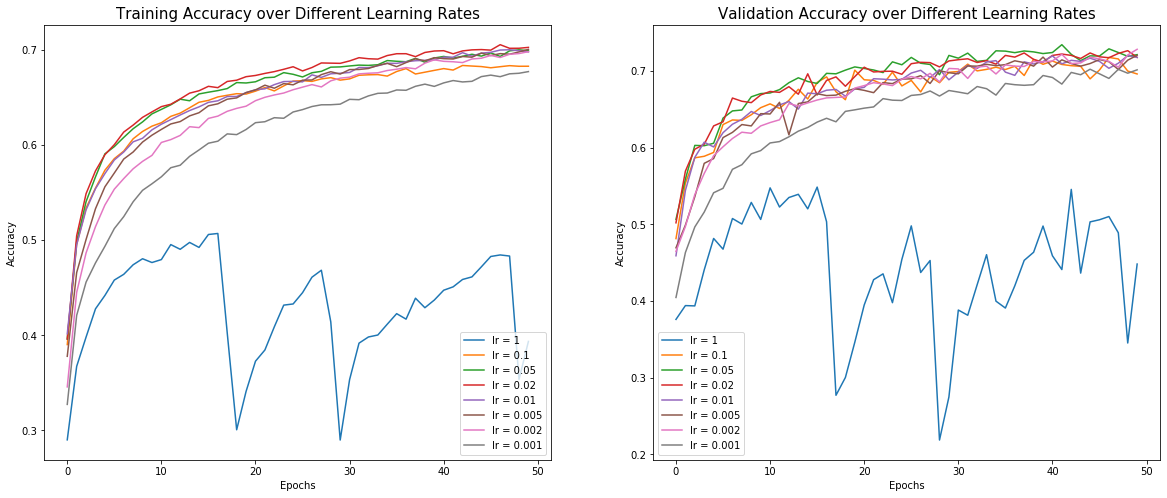

In [11]:
bn10NEWEST = pd.read_csv('bn_lr10NEWEST.csv')
all_list = [bn10NEWEST, bn1, bn05, bn02, bn01, bn005, bn002, bn001]
label_list = ['lr = 1', 'lr = 0.1', 'lr = 0.05', 'lr = 0.02', 'lr = 0.01', 'lr = 0.005', 'lr = 0.002', 'lr = 0.001']

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
for i in range(len(all_list)):
    # Plot train acc
    plt.title('Training Accuracy over Different Learning Rates', size = 15)
    plt.plot(all_list[i].iloc[:,1], label = label_list[i])
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()

plt.subplot(1,2,2)
for i in range(len(all_list)):
    # Plot validation acc
    plt.title('Validation Accuracy over Different Learning Rates', size = 15)
    plt.plot(all_list[i].iloc[:,2], label = label_list[i])
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()

plt.show()

• (6 pts) Use different L2 regularization strengths: 0.01, 0.001, 0.0001, 0.00001, 0.0, to see how the L2 regularization strength affects the model performance. Report the results for each regularization strength value along with commentary on the importance of this hyperparameter.

> As shown in the plots below, increasing regularization strength decreases model training and validation accuracy. This makes sense as regularization is a penalty. Using a regularization strength of 0.00001 had almost no effect on training. A regularization strength of 0.01 made the model perform quite unwell, having a training and validation accuracy around 0.50. This is likely due to the fact that the L2 norm of the weights makes up a very significant portion of the loss function so the model may be optimizing for weights lower in magnitude than lowering the actual cross entropy loss. Regularization is generally used when model complexity is high. Regularization is generally used to punish complex models and reduce overfitting. Since overfitting is not observed here, it is difficult to ascertain which regularization strength is best but to be safe we can go with 0.00001 or 0.0001. We will proceed with 0.0001 from here as the model is not very complex.

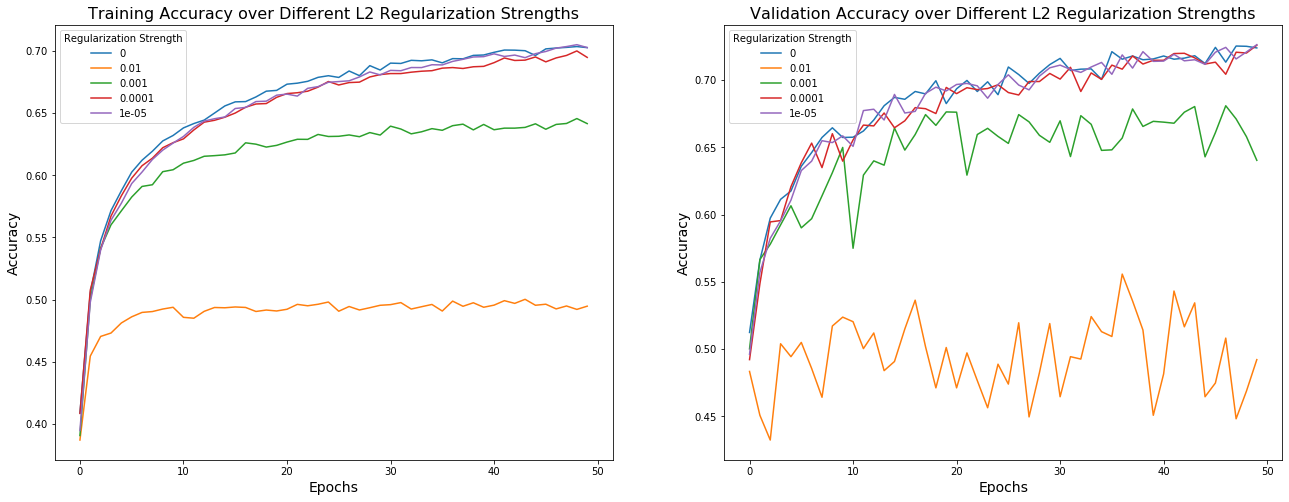

In [4]:
reg0 = pd.read_csv("REG_0.csv")
reg01 = pd.read_csv("REG_001.csv")
reg001 = pd.read_csv("REG_0001.csv")
reg0001 = pd.read_csv("REG_00001.csv")
reg00001 = pd.read_csv("REG_000001.csv")

all_list = [reg0, reg01, reg001, reg0001, reg00001]
label_list = [0, 0.01, 0.001, 0.0001, 0.00001]

plt.figure(figsize=(22,8))

plt.subplot(1,2,1)
for i in range(len(all_list)):
    # Plot train acc
    plt.title('Training Accuracy over Different L2 Regularization Strengths', size = 16)
    plt.plot(all_list[i].iloc[:,1], label = label_list[i])
    plt.xlabel("Epochs", size = 14)
    plt.ylabel('Accuracy', size = 14)
    plt.legend(title = 'Regularization Strength')

plt.subplot(1,2,2)
for i in range(len(all_list)):
    # Plot train acc
    plt.title('Validation Accuracy over Different L2 Regularization Strengths', size = 16)
    plt.plot(all_list[i].iloc[:,2], label = label_list[i])
    plt.xlabel("Epochs", size = 14)
    plt.ylabel('Accuracy', size = 14)
    plt.legend(title = 'Regularization Strength')
plt.show()

• (Bonus, 6 pts) Switch the regularization penalty from L2 penalty to L1 penalty. This means you may not use the weight_decay parameter in PyTorch builtin optimizers, as it does not support L1 regularization. Instead, you can try to add L1 penalty as a part of the loss func- tion. Compare the distribution of weight parameters after L1/L2 regularization. Describe your observations.

> From what I can tell, the weights that have L2 regularization appear to look more normal and are not as skewed as the weights that had L1 regularization. It also appears as if the magnitude of the weights, when L1 regularization was used, is smaller than the weights resulting from using L2 regularization. This may be due to the fact that lambda is 1 in L1 and in L2 our regularization strength is only 0.01. The weight histograms are located below. L2 weight distribution is shown first, followed by L1 weight distributions. What I expected to see was more weights at zero for L1 regularization compared to L2 regularization due to the diamond loss countour as it is more likely to meet the cross entropy loss at an axis where some of the parameters would be zero. 

### L2 Weight Histograms

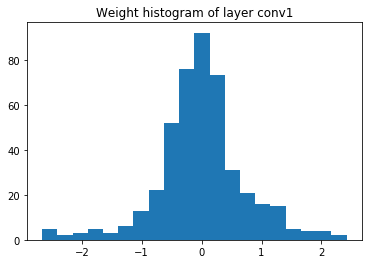

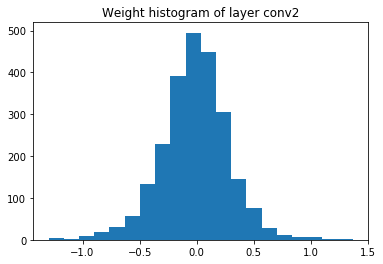

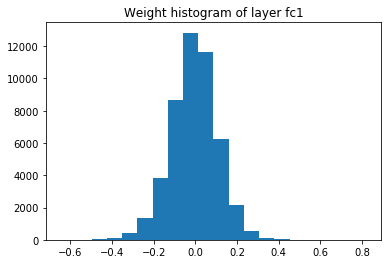

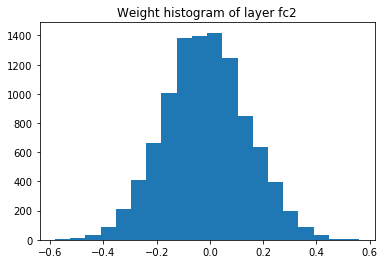

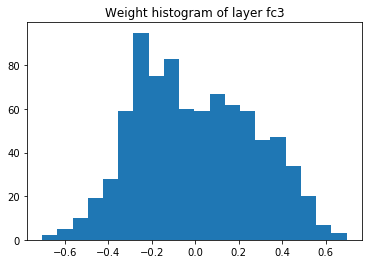

In [371]:
# L2 reg = 0.0001
for name, module in net.named_modules():
    if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
        # Get the weight of the module as a NumPy array
        weight = module.weight.cpu().detach().numpy()  
        
        # Reshape for histogram
        weight = weight.reshape(-1)
        _ = plt.hist(weight, bins=20)
        plt.title("Weight histogram of layer "+name)
        plt.show()

### L1 Weight Histograms

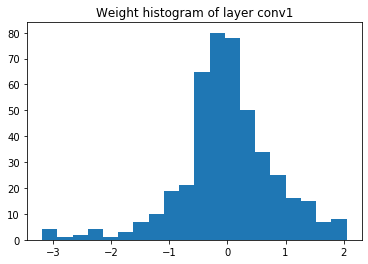

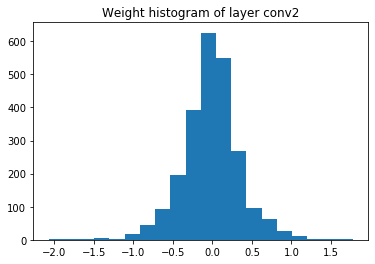

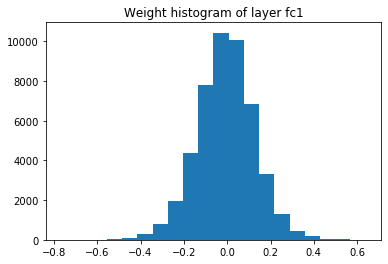

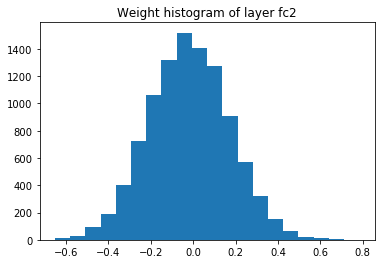

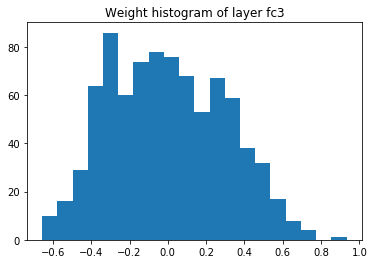

In [382]:
# L1 lamb = 1
for name, module in net.named_modules():
    if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
        # Get the weight of the module as a NumPy array
        weight = module.weight.cpu().detach().numpy()  
        
        # Reshape for histogram
        weight = weight.reshape(-1)
        _ = plt.hist(weight, bins=20)
        plt.title("Weight histogram of layer "+name)
        plt.show()

# 4 Lab: Advanced CNN architectures (16 pts)

I was able to achieve a validation accuracy of 0.9066 for ResNet on the CIFAR-10 using the following hyper parameters:

- Initial learning rate of 0.2

- Learning rate decay of 0.1 after 25 epochs

- L2 regularization strength of 1e-5

- 105 total epochs